In [1]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
import spacy
from spacy.matcher import Matcher 
from spacy.tokens import Span 
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import spacy
import textacy

In [2]:
nlp = spacy.load('en_core_web_sm')

doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

The ... det
22-year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [3]:
doc = nlp("Nagal won the first set.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Nagal ... nsubj
won ... ROOT
the ... det
first ... amod
set ... dobj
. ... punct


In [4]:
nlp=spacy.load('en_core_web_sm')
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [5]:
dataframe = pd.read_csv("dataSet.csv")

In [6]:
dataframe

,text,sentiment,id
0,missed sam spin tonight stooped work boo,0,1883595516
1,bad news,0,1883595722
2,blackberry broken feeling withdrawal get fixed no leash,0,1883595996
3,work feel sick,0,1883596562
4,morning twittertown valencia since discovered someone fridge seriously good,0,1883596891
...,...,...,...
1589242,woke no school best feeling ever,4,2193601966
1589243,theda com cool hear old walt interview beta,4,2193601969
1589244,ready mojo makeover ask detail,4,2193601991
1589245,happy th birthday boo time tupac amaru shaker,4,2193602064


In [7]:
candidate_sentences = dataframe['text']

In [8]:
candidate_sentences.shape


(1589247,)

In [9]:
candidate_sentences.sample(5)


1200038                                  ah awake alone cannon sleep talk
787236              start learning cisco follow think not like retreating
480814     hanging around chilling listening good music no rain whole day
115978                                                   tired exam study
280330                            used weave not remember tie warp thread
Name: text, dtype: object

In [10]:
doc = nlp("the drawdown process is governed by astm standard d823")

for tok in doc:
  print(tok.text, "...", tok.dep_)

the ... det
drawdown ... compound
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... compound
d823 ... pobj


In [11]:
'''def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]
'''

'def get_entities(sent):\n  ## chunk 1\n  ent1 = ""\n  ent2 = ""\n\n  prv_tok_dep = ""    # dependency tag of previous token in the sentence\n  prv_tok_text = ""   # previous token in the sentence\n\n  prefix = ""\n  modifier = ""\n\n  #############################################################\n  \n  for tok in nlp(sent):\n    ## chunk 2\n    # if token is a punctuation mark then move on to the next token\n    if tok.dep_ != "punct":\n      # check: token is a compound word or not\n      if tok.dep_ == "compound":\n        prefix = tok.text\n        # if the previous word was also a \'compound\' then add the current word to it\n        if prv_tok_dep == "compound":\n          prefix = prv_tok_text + " "+ tok.text\n      \n      # check: token is a modifier or not\n      if tok.dep_.endswith("mod") == True:\n        modifier = tok.text\n        # if the previous word was also a \'compound\' then add the current word to it\n        if prv_tok_dep == "compound":\n          modifier = p

In [12]:
'''def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)
  
'''

'def get_relation(sent):\n\n  doc = nlp(sent)\n\n  # Matcher class object \n  matcher = Matcher(nlp.vocab)\n\n  #define the pattern \n  pattern = [{\'DEP\':\'ROOT\'}, \n            {\'DEP\':\'prep\',\'OP\':"?"},\n            {\'DEP\':\'agent\',\'OP\':"?"},  \n            {\'POS\':\'ADJ\',\'OP\':"?"}] \n\n  matcher.add("matching_1", None, pattern) \n\n  matches = matcher(doc)\n  k = len(matches) - 1\n\n  span = doc[matches[k][1]:matches[k][2]] \n\n  return(span.text)\n  \n'

In [13]:
dataframe = shuffle(dataframe)
dataframe.reset_index(inplace=True, drop=True) 

train, test = train_test_split(dataframe, test_size=0.2)
train_1, train_2 = train_test_split(train, test_size=0.5)


In [14]:
mask = train_1['sentiment']==0
df_train_1_negative = train_1[mask]

In [15]:
df_train_1_negative

,text,sentiment,id
303426,lot pain,0,1825678510
938917,want pom juice,0,1793923499
800409,thanks mama lift sh lost bed bath beyond,0,2298621411
1396049,lost eye telescope disaster,0,2257752075
843017,shit att not finish mm data feature yet see tomorrow g think,0,2230860460
...,...,...,...
1367317,feel tho junior mom give dog everything sometimes throw,0,2244306663
1356301,way sleep body hurt missing babe davie max ppl jus dna understand,0,2063602552
335135,slow day store weather must nice not seen outdoors week,0,2242618612
1047772,security running u thinking fight box elder bug sh trying regain coolness,0,2249587062


In [16]:
df_train_1_positive = train_1[~mask]

In [17]:
df_train_1_positive

,text,sentiment,id
41184,stop looking ok found way,4,1835095457
324568,lol stop mean follower not like bull ish block,4,2009589415
406570,going back later bigg cuddle kiss hope enjoy rest afternoon xx,4,2178392712
1488478,finally home already feel tension,4,1985035173
1030898,visit crib cook waiting blatant,4,1759653449
...,...,...,...
1584724,im room watching hannahmovie witham said film great,4,1752647274
1282111,sound like best kind birthday celebration glad fun happy australia,4,1556315705
183855,finally not disturb lil provocateur lol,4,2046913451
1409259,convention goin fool go,4,1994722374


In [18]:
candidate_sentences_train_1_positive = df_train_1_positive['text']

In [19]:
candidate_sentences_train_1_positive

41184                                                               stop looking ok found way
324568                                         lol stop mean follower not like bull ish block
406570                         going back later bigg cuddle kiss hope enjoy rest afternoon xx
1488478                                                     finally home already feel tension
1030898                                                       visit crib cook waiting blatant
                                                  ...                                        
1584724                                   im room watching hannahmovie witham said film great
1282111                    sound like best kind birthday celebration glad fun happy australia
183855                                                finally not disturb lil provocateur lol
1409259                                                               convention goin fool go
845237     aww get well soon love good thing school opening 

In [20]:
triples = []
nlp = spacy.load('en_core_web_sm')
for i in tqdm(candidate_sentences_train_1_positive):
    text = nlp(i)
    text_ext = textacy.extract.subject_verb_object_triples(text)
    triples.append(list(text_ext))

100%|██████████| 317354/317354 [1:21:49<00:00, 64.64it/s]  


In [21]:
_triples = []
for i in triples:
    if len(i) > 0:
        _triples.append(i)
    

In [22]:
len(_triples)

73888

In [23]:
_triples

[[(cuddle kiss hope, enjoy, xx)],
 [(home, feel, tension)],
 [(post, inspired, shop blow banner)],
 [(sunny, want, take)],
 [(cool, explains, flower)],
 [(va center, helped, unload), (water stop truck, got, lola)],
 [(jessica, getting, bell)],
 [(going, want, check)],
 [(laura, thank, glad)],
 [(cannon, speak, love)],
 [(chance folk, see, swell)],
 [(dog asleep, get, computer)],
 [(shipping, shipped, charge)],
 [(slumdog, millionaire, movie)],
 [(anyone, want, talk)],
 [(getting, need, start),
  (getting, need, going),
  (bed, need, start),
  (bed, need, going)],
 [(everyone, keep, staring)],
 [(training peep, want, learn)],
 [(omg forgot, give, dog food morning),
  (omg forgot, give, ate),
  (omg forgot, give, call)],
 [(entry twitter friend, put, name)],
 [(desk work, take, readjustment)],
 [(beware site, may cause, make)],
 [(mother day, tell, ur), (mother day, tell, familia)],
 [(everybody, see, monday ciao friend)],
 [(aha, could see, boogie), (aha, could see, light)],
 [(getting,

In [24]:
# extract subject
source = [i[0][0] for i in _triples]


In [25]:
# extract object
target = [i[0][2] for i in _triples]

In [26]:
relations = [i[0][1] for i in _triples]

In [27]:
#create the graph
positive_class_knowledge_graph = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [28]:
#G_pos = nx.from_pandas_edgelist(positive_class_knowledge_graph, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

In [46]:
#TO PLOT 

#plt.figure(figsize=(12,12))
#pos = nx.spring_layout(G)
#nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
#plt.show()

In [28]:
positive_class_knowledge_graph

,source,target,edge
0,"(cuddle, kiss, hope)",(xx),(enjoy)
1,(home),(tension),(feel)
2,(post),"(shop, blow, banner)",(inspired)
3,(sunny),(take),(want)
4,(cool),(flower),(explains)
...,...,...,...
73883,(cooking),(start),(say)
73884,(lol),(nudge),"(would, going)"
73885,"(omg, twitter)","(day, college)",(taking)
73886,(hand),(ika),(darling)


In [1]:
positive_class_knowledge_graph.edge.value_counts()

NameError: name 'positive_class_knowledge_graph' is not defined

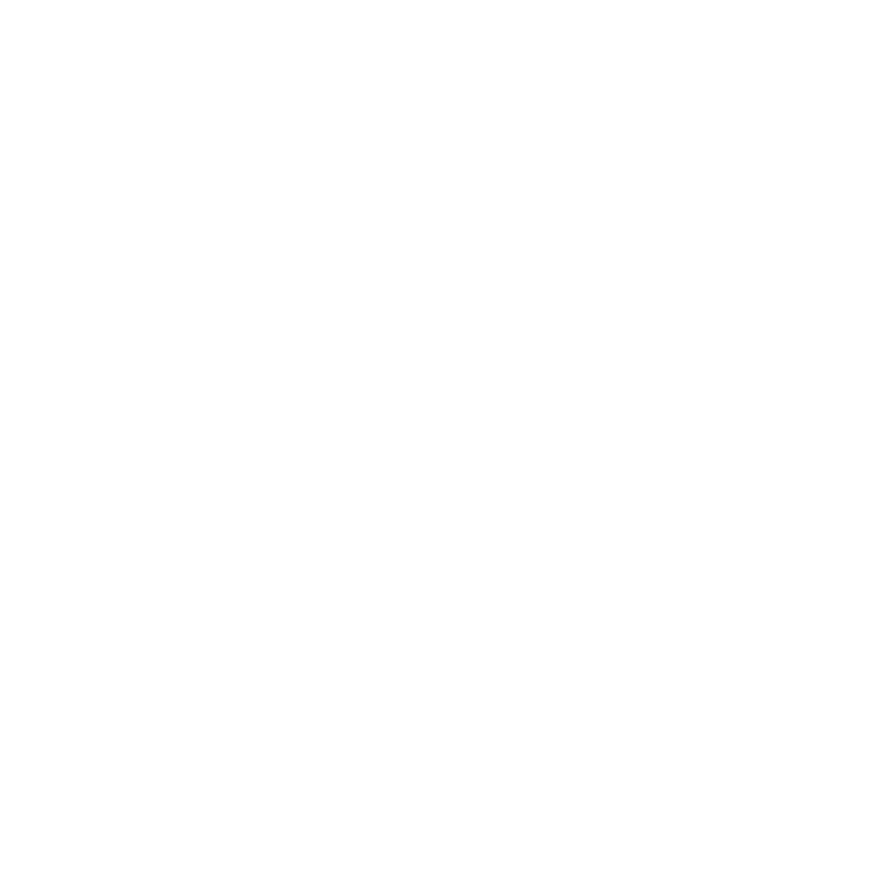

In [35]:
G=nx.from_pandas_edgelist(positive_class_knowledge_graph[positive_class_knowledge_graph['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()